___

<a href='https://github.com/mmiskiewicz'> <img src='https://user-images.githubusercontent.com/32812860/228994946-09781515-b6c1-4e54-8cbe-478e84c679c3.gif' /></a>
___


# About the project

This project contains **analysis of the following banks**:
- **Bank of America**
- **CitiGroup**
- **Goldman Sachs**
- **JPMorgan Chase**
- **Morgan Stanley**
- **Wells Fargo**

The main goal is to see **how bank stocks progressed throughout the financial crisis all the way to 2023**.

# Imports

In [2]:
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import plotly
import cufflinks as cf
%matplotlib inline
!pip install yfinance

In [3]:
cf.go_offline()

Setting seaborn style

In [4]:
sns.set_style('whitegrid')

# Getting stock data

The first step is to get the stock data. For this project I'm retrieving data from *Jan 1st 2006* to *Jan 1st 2023* for each of these 6 banks. **Each bank will be in a separate dataframe**, with the **variable name for that bank being its ticker symbol**.

In [5]:
yf.pdr_override()

In [6]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2023, 1, 1)

In [7]:
# Bank of America
BAC = data.get_data_yahoo("BAC", start, end)
# CitiGroup
C = data.get_data_yahoo('C', start, end)
# Goldman Sachs
GS = data.get_data_yahoo('GS', start, end)
# JPMorgan Chase
JPM = data.get_data_yahoo('JPM', start, end)
# Morgan Stanley
MS = data.get_data_yahoo('MS', start, end)
# Wells Fargo
WFC = data.get_data_yahoo('WFC', start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
tickers = ["BAC", "C", "GS", "JPM", "MS", "WFC"]

In [9]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], keys = tickers, axis = 1)

In [10]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [11]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.695667  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  32.348434  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  32.390083  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  32.341484  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  32.362316  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  34.310345  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  34.333885  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  34.428043  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  34.463333  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  34.828156  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.695110  11016400  
2006-01-04   31.530001  19.466671  10870000  
2006-01-05   31.495001  19.445061  10158000  
2006-01-06   31.680000  19.559286   8403800  
2006-01-09   31.674999  19.556202   5619600  

[5 rows x 36 columns]

In [12]:
bank_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4279 entries, 2006-01-03 to 2022-12-30
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (BAC, Open)       4279 non-null   float64
 1   (BAC, High)       4279 non-null   float64
 2   (BAC, Low)        4279 non-null   float64
 3   (BAC, Close)      4279 non-null   float64
 4   (BAC, Adj Close)  4279 non-null   float64
 5   (BAC, Volume)     4279 non-null   int64  
 6   (C, Open)         4279 non-null   float64
 7   (C, High)         4279 non-null   float64
 8   (C, Low)          4279 non-null   float64
 9   (C, Close)        4279 non-null   float64
 10  (C, Adj Close)    4279 non-null   float64
 11  (C, Volume)       4279 non-null   int64  
 12  (GS, Open)        4279 non-null   float64
 13  (GS, High)        4279 non-null   float64
 14  (GS, Low)         4279 non-null   float64
 15  (GS, Close)       4279 non-null   float64
 16  (GS, Adj Close)   4279 n

# Exploring data

**Max Close Price for each bank throughout the time period**

In [13]:
bank_stocks.xs(key = "Close", axis = 1, level = "Stock Info").max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     423.850006
JPM    171.779999
MS     108.730003
WFC     65.930000
dtype: float64

**Calculating the returns for each bank's stock**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [14]:
returns = pd.DataFrame()

In [15]:
for tick in tickers:
    returns[tick + " Return"] = bank_stocks[tick]["Close"].pct_change()

In [16]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


**Pairplot of the returns**

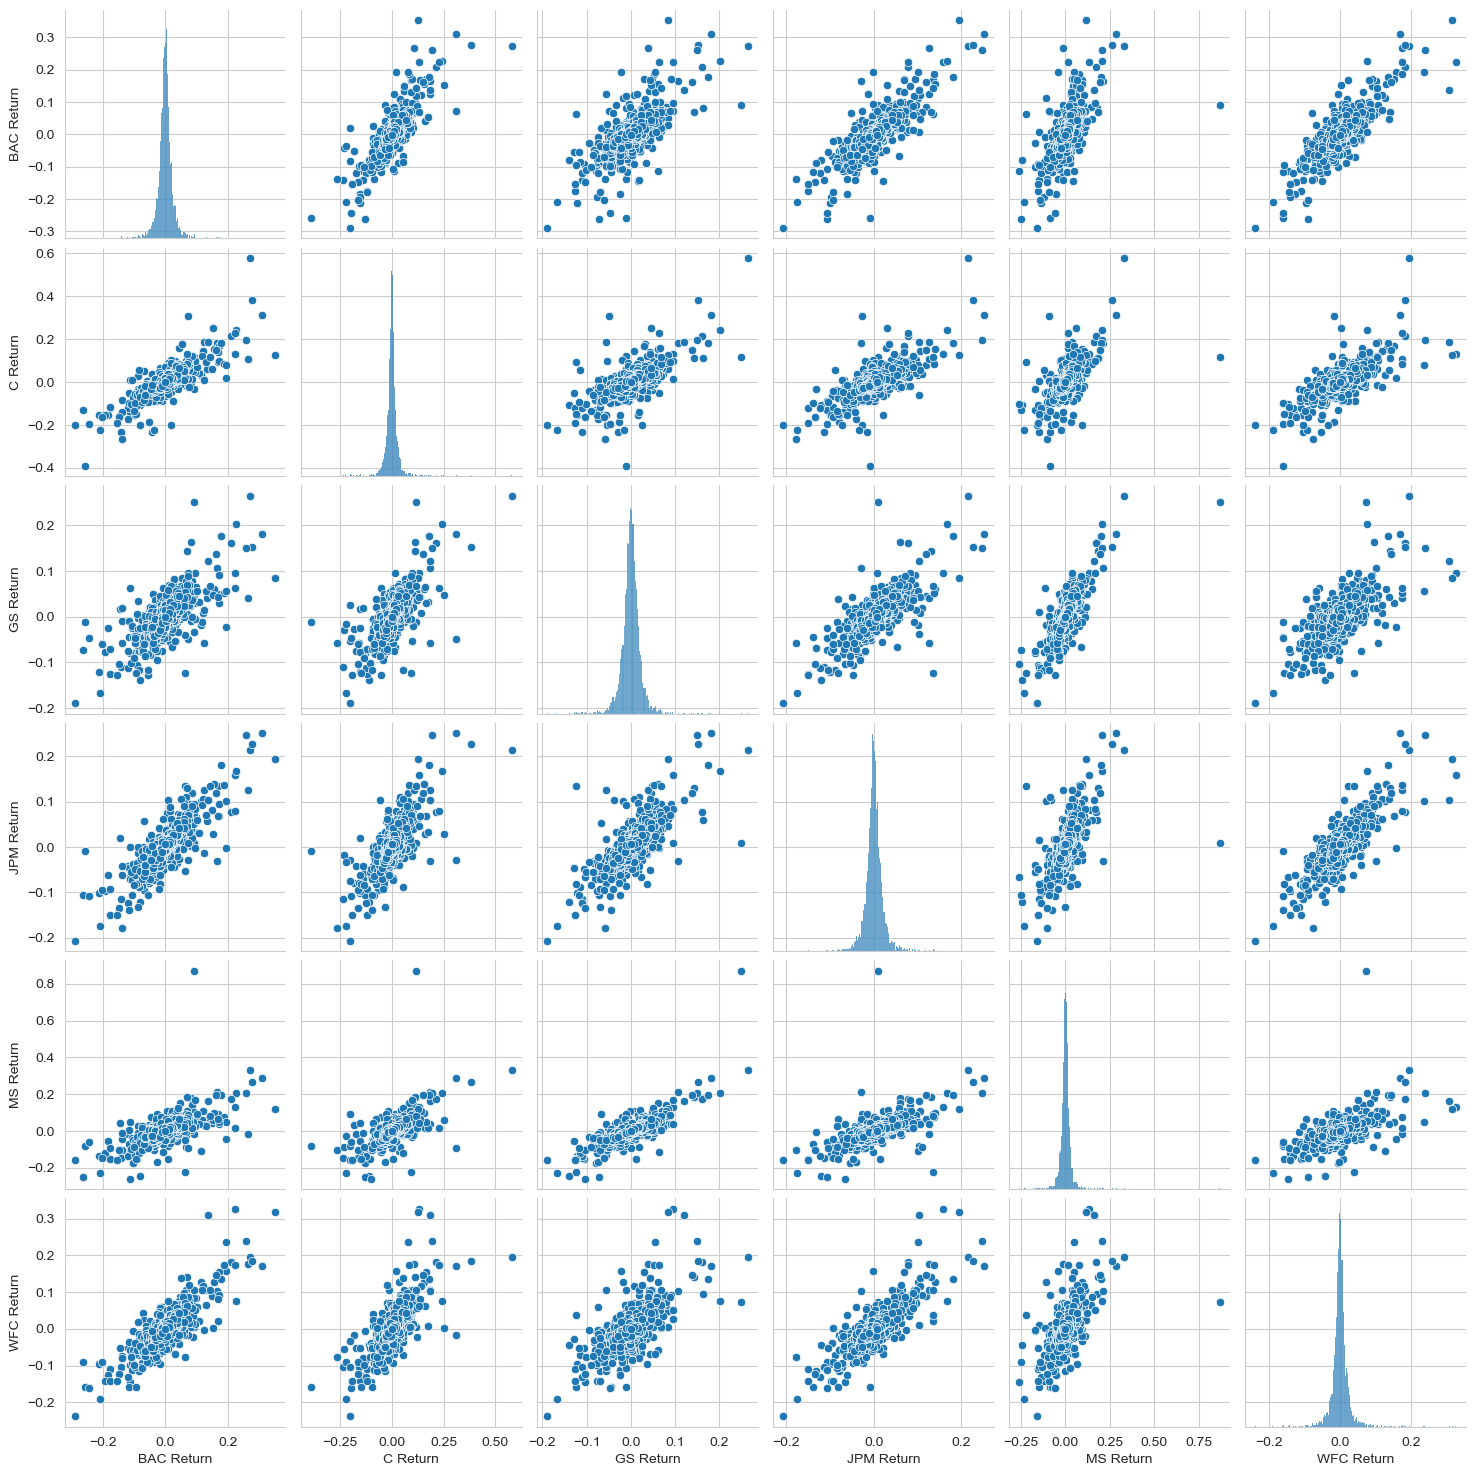

In [17]:
sns.pairplot(returns[1:])

**Figuring out on which days each bank had the best and worst single day returns**

Fun fact: **2009-01-20 was the inauguration day of Barack Obama** - the very same day when 4 banks had the worst single day returns

In [18]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

**JPMorgan Chase had the best single day return on 2009-01-21** - day after Barack Obama's inauguration.

In [19]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

Down below is the standard deviation of the returns. Turns out **CitiGroup is the riskiest of the bunch**.

In [20]:
returns.std()

BAC Return    0.031171
C Return      0.032954
GS Return     0.023078
JPM Return    0.024309
MS Return     0.031985
WFC Return    0.026867
dtype: float64

This distribution plot indicates the **financial crisis that the CitiGroup stock went through**

C:\Users\brmis\AppData\Local\Temp\ipykernel_10108\2426009023.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='C Return', ylabel='Density'>

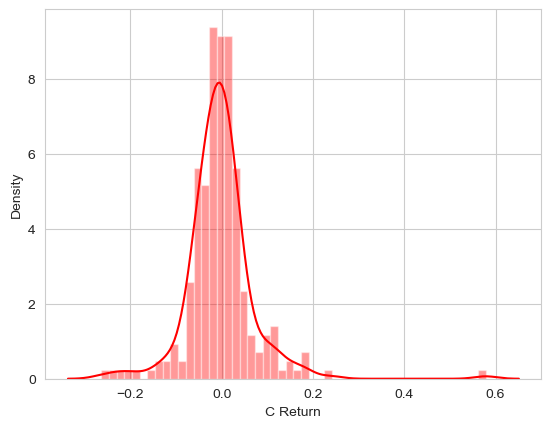

In [21]:
sns.distplot(returns["2008-01-01": "2008-12-31"]["C Return"], bins = 50, color = "red")

**Line plot showing Close price for each bank for the entire index of time**

<Axes: xlabel='Date'>

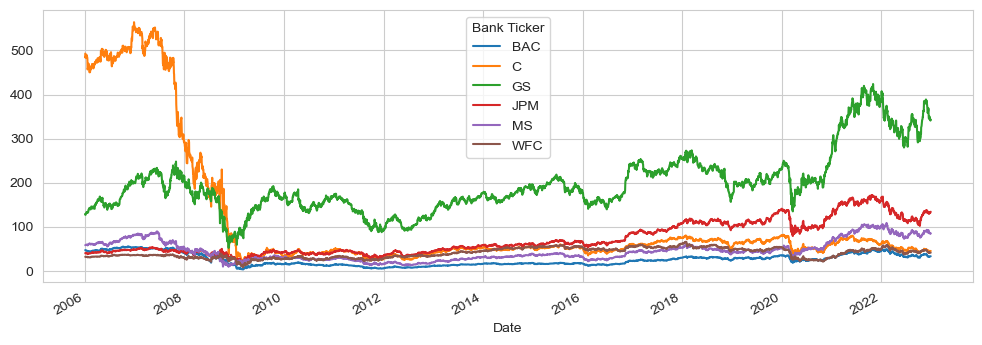

In [22]:
bank_stocks.xs(key = "Close", axis = 1, level = "Stock Info").plot(figsize = (12, 4))

*Same thing, just more interactive* (rerun if you're seeing blanks)

In [23]:
bank_stocks.xs(key = "Close", axis = 1, level = "Stock Info").iplot()

**Analyzing the moving averages for CitiGroup stocks in the year 2008**

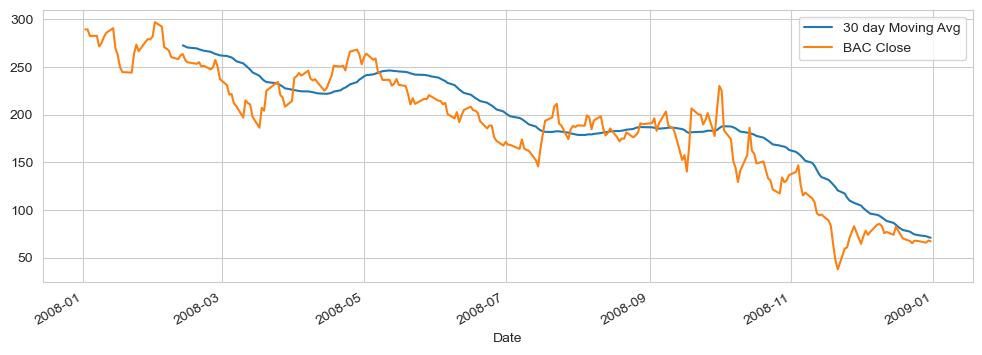

In [24]:
plt.figure(figsize = (12, 4))
C["Close"]["2008-01-01": "2009-01-01"].rolling(window = 30).mean().plot(label = "30 day Moving Avg")
C["Close"]["2008-01-01": "2009-01-01"].plot(label = "BAC Close")
plt.legend()

**Creating a heatmap of the correlation between the stocks Close Price**

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

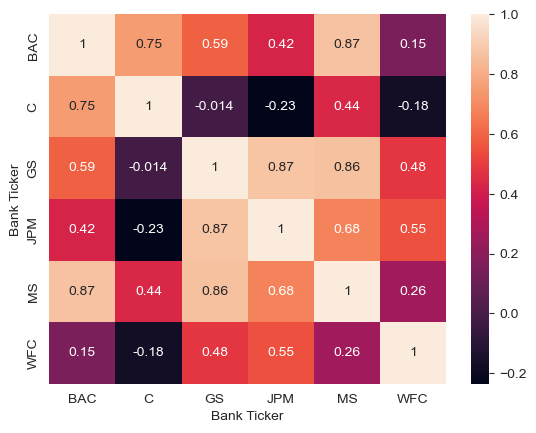

In [25]:
sns.heatmap(bank_stocks.xs(key = "Close", axis = 1, level = "Stock Info").corr(), annot = True)

**Using clustermap to cluster the correlations together**

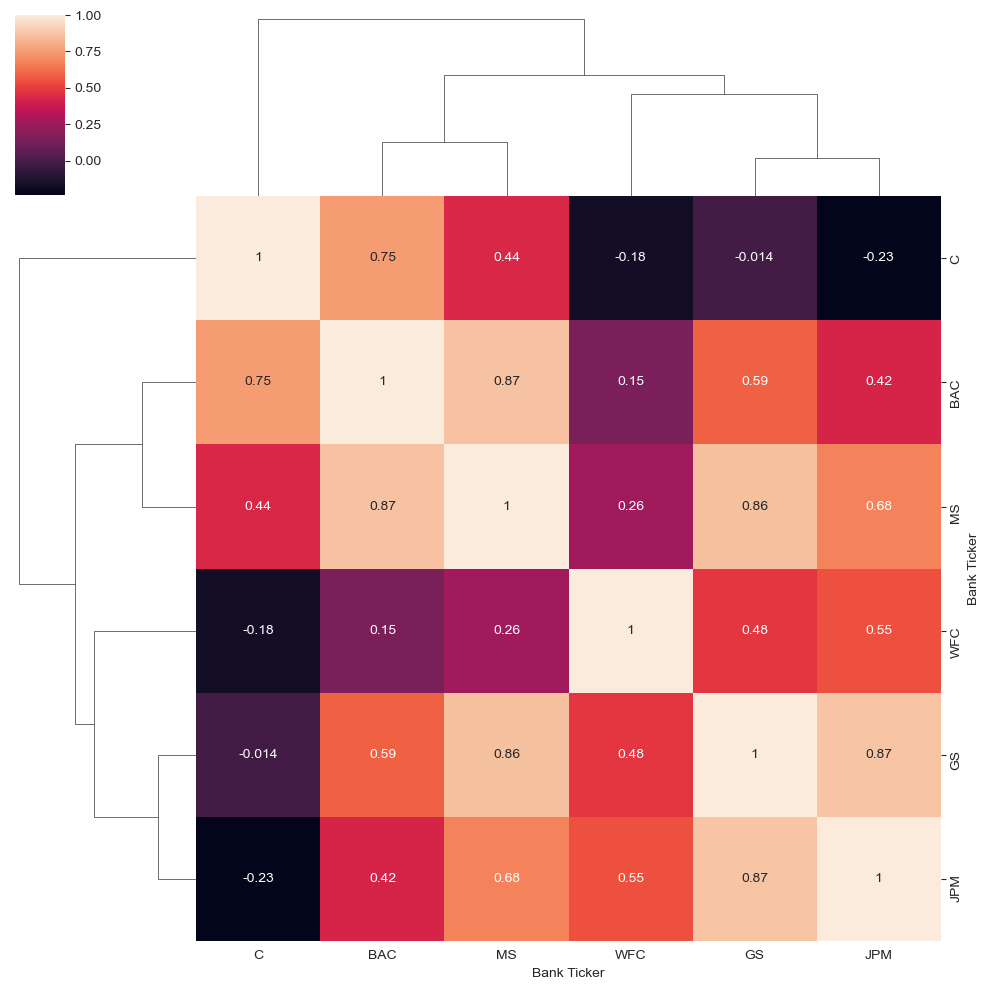

In [26]:
sns.clustermap(bank_stocks.xs(key = "Close", axis = 1, level = "Stock Info").corr(), annot = True)

**Creating a candle plot of Bank of America's stock from Jan 1st 2020 to Jan 1st 2023** (rerun if you're seeing blanks)

In [27]:
bac15 = BAC[["Open", "High", "Low", "Close"]]["2020-01-01":"2023-01-01"]
bac15.iplot(kind = "candle")

**Creating a Simple Moving Averages plot of Wells Fargo for the year 2022** (rerun if you're seeing blanks)

In [28]:
WFC["Close"]["2022-01-01":"2023-01-01"].ta_plot(study="sma", periods = [13, 21, 55])

**Creating a Bollinger Band Plot for Goldman Sachs for the year 2022** (rerun if you're seeing blanks)

In [29]:
GS["Close"]["2022-01-01":"2023-01-01"].ta_plot(study = "boll")